<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from mantisshrimp.all import *

In [2]:
source = Path('/home/lgvaz/.data/PennFudanPed/')

In [3]:
(source/'Annotation').ls()

(#170) [Path('/home/lgvaz/.data/PennFudanPed/Annotation/PennPed00083.txt'),Path('/home/lgvaz/.data/PennFudanPed/Annotation/FudanPed00050.txt'),Path('/home/lgvaz/.data/PennFudanPed/Annotation/PennPed00082.txt'),Path('/home/lgvaz/.data/PennFudanPed/Annotation/PennPed00062.txt'),Path('/home/lgvaz/.data/PennFudanPed/Annotation/FudanPed00062.txt'),Path('/home/lgvaz/.data/PennFudanPed/Annotation/PennPed00018.txt'),Path('/home/lgvaz/.data/PennFudanPed/Annotation/PennPed00067.txt'),Path('/home/lgvaz/.data/PennFudanPed/Annotation/FudanPed00009.txt'),Path('/home/lgvaz/.data/PennFudanPed/Annotation/FudanPed00016.txt'),Path('/home/lgvaz/.data/PennFudanPed/Annotation/FudanPed00014.txt')...]

In [14]:
lines = L((source/'Annotation/PennPed00083.txt').read().split('\n'))
lines = lines.filter(lambda o: o.startswith('Pixel mask for object'))
for line in lines:
    fn = re.findall(r'"(.+)"', line.split(':')[-1])[0]

In [16]:
source.parent/fn

Path('/home/lgvaz/.data/PennFudanPed/PedMasks/PennPed00083_mask.png')

In [5]:
sz = lines.filter(lambda o: o.startswith('Image size (X x Y x C)'))[0]
sz = re.search(r'\d{3,4}\sx\s\d{3,4}\sx\s3', sz).group()
sz = lmap(int, sz.split('x'))

In [6]:
fp = lines.filter(lambda o: o.startswith('Image filename'))[0]
fp = re.findall(r'"(.*)"', fp)[0]
fp = source.parent/fp

In [7]:
iid = re.findall(r'\d.+', fp.stem)[0]

In [8]:
class PersonImageParser(ImageParser):
    def prepare(self, o):
        self.i = getattr(self, 'i', 0) + 1
        self.lines = L(o.read().split('\n'))
        # Get size
        sz = self.lines.filter(lambda o: o.startswith('Image size (X x Y x C)'))[0]
        sz = re.search(r'\d{3,4}\sx\s\d{3,4}\sx\s3', sz).group()
        self.sz = lmap(int, sz.split('x'))
        
    def iid(self, o): return self.i
    def file_path(self, o):
        fp = self.lines.filter(lambda o: o.startswith('Image filename'))[0]
        fp = re.findall(r'"(.*)"', fp)[0]
        # TODO: Complete fp
        return self.source.parent/fp
    
    def width(self, o):  return self.sz[0]
    def height(self, o): return self.sz[1]

In [9]:
fns = get_files(source/'Annotation', extensions='.txt')
iparser = PersonImageParser(fns, source)

In [10]:
imgs = iparser.parse()

In [11]:
class PersonAnnotationParser(AnnotationParser):
    def prepare(self, o):
        self.i = getattr(self, 'i', 0) + 1
        self.lines = L(o.read().split('\n'))
        ln = self.lines.filter(lambda o: o.startswith('Objects with ground truth'))[0]
        self.n = int(re.findall('\d+', ln)[0])
        
    def iid(self, o): return self.i
    def oid(self, o): return [1]*self.n
    def iscrowd(self, o): return [0]*self.n
        
    def bbox(self, o):
        lines = self.lines.filter(lambda o: o.startswith('Bounding box'))
        bboxes = []
        for bbox in lines:
            bbox = re.findall(r'(\d+,\s\d+)', bbox)
            bbox = lmap(lambda o: lmap(int, o.split(',')), bbox)
            bbox = np.array(bbox).flat
            bboxes.append(BBox.from_xyxy(*bbox))
        return bboxes

In [12]:
class PersonParser(DataParser):
    def get_img_parser(self, o, source): return PersonImageParser(o, source)
    def get_annot_parser(self, o): return PersonAnnotationParser(o)

In [13]:
parser = PersonParser(fns, source)

In [14]:
records = parser.parse()


Removed 0 images that don't have annotations


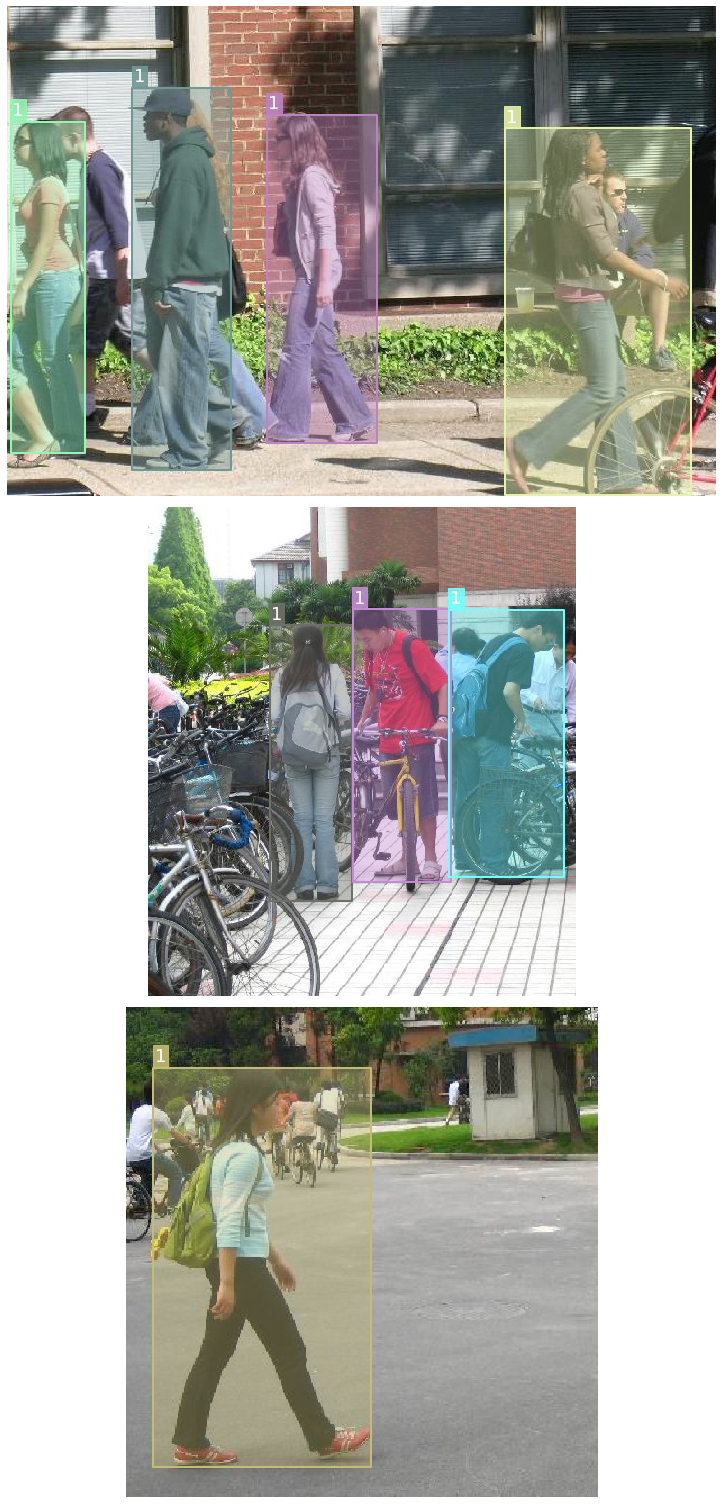

In [22]:
grid(partial(show_record, bbox=True), records[42:45])

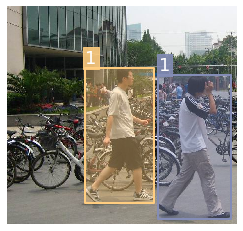

In [21]:
show_record(records[7], bbox=True)

In [15]:
annot_parser = PersonAnnotationParser(fns)

In [16]:
annots = annot_parser.parse()


96


In [18]:
len(annots)

96

In [14]:
bboxes = lines.filter(lambda o: o.startswith('Bounding box'))

In [15]:
for bbox in bboxes: pass

In [16]:
bbox = re.findall(r'(\d+,\s\d+)', bbox)
bbox = lmap(lambda o: lmap(int, o.split(',')), bbox)
bbox = np.array(bbox).flat
bbox = BBox.from_xyxy(*bbox)

In [20]:
L([bbox])

(#1) [BBox(pnts=[38, 22, 124, 299])]

In [41]:
[o for o in np.array(bbox).flat]

[38, 22, 124, 299]

In [35]:
np.flat

AttributeError: module 'numpy' has no attribute 'flat'